In [1]:
from google.colab import files

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
uploaded = files.upload()

Saving archive (3) (3).zip to archive (3) (3).zip


In [ ]:
import zipfile
import os
zip_path = "archive (3) (3).zip"

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall("extracted_files")

In [ ]:
os.listdir("extracted_files")

['Final_Augmented_dataset_Diseases_and_Symptoms.csv']

In [ ]:
import pandas as pd

#Adjust filename based on what's printed from os.listdir
excel_path = "extracted_files/Final_Augmented_dataset_Diseases_and_Symptoms.csv"

In [ ]:
df=pd.read_csv("extracted_files/Final_Augmented_dataset_Diseases_and_Symptoms.csv")
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rows,cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")
print(df['diseases'].unique())

Number of rows: 246945
Number of columns: 378
['panic disorder' 'vocal cord polyp' 'turner syndrome' 'cryptorchidism'
 'poisoning due to ethylene glycol' 'atrophic vaginitis'
 'fracture of the hand' 'cellulitis or abscess of mouth'
 'eye alignment disorder' 'headache after lumbar puncture'
 'pyloric stenosis' 'salivary gland disorder' 'osteochondrosis'
 'injury to the knee' 'metabolic disorder' 'vaginitis'
 'sick sinus syndrome' 'tinnitus of unknown cause' 'glaucoma'
 'eating disorder' 'transient ischemic attack' 'pyelonephritis'
 'rotator cuff injury' 'chronic pain disorder' 'problem during pregnancy'
 'liver cancer' 'atelectasis' 'injury to the hand' 'choledocholithiasis'
 'injury to the hip' 'cirrhosis' 'thoracic aortic aneurysm'
 'subdural hemorrhage' 'diabetic retinopathy' 'fibromyalgia'
 'ischemia of the bowel' 'fetal alcohol syndrome' 'peritonitis'
 'injury to the abdomen' 'acute pancreatitis' 'thrombophlebitis' 'asthma'
 'foreign body in the vagina' 'restless leg syndrome' 'emp

In [ ]:
diseases =df['diseases'].unique().tolist()
print(diseases)

['panic disorder', 'vocal cord polyp', 'turner syndrome', 'cryptorchidism', 'poisoning due to ethylene glycol', 'atrophic vaginitis', 'fracture of the hand', 'cellulitis or abscess of mouth', 'eye alignment disorder', 'headache after lumbar puncture', 'pyloric stenosis', 'salivary gland disorder', 'osteochondrosis', 'injury to the knee', 'metabolic disorder', 'vaginitis', 'sick sinus syndrome', 'tinnitus of unknown cause', 'glaucoma', 'eating disorder', 'transient ischemic attack', 'pyelonephritis', 'rotator cuff injury', 'chronic pain disorder', 'problem during pregnancy', 'liver cancer', 'atelectasis', 'injury to the hand', 'choledocholithiasis', 'injury to the hip', 'cirrhosis', 'thoracic aortic aneurysm', 'subdural hemorrhage', 'diabetic retinopathy', 'fibromyalgia', 'ischemia of the bowel', 'fetal alcohol syndrome', 'peritonitis', 'injury to the abdomen', 'acute pancreatitis', 'thrombophlebitis', 'asthma', 'foreign body in the vagina', 'restless leg syndrome', 'emphysema', 'cystic

In [ ]:
print(df.columns)

Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)


In [ ]:
import math
diseases= sorted(df['diseases'].unique())
cols =5
rows = math.ceil(len(diseases) / cols)

In [ ]:
diseases +=[''] * (rows * cols -len(diseases))

In [ ]:
disease_table = pd.DataFrame([diseases[i * cols:(i + 1) * cols] for i in range(rows)])

In [ ]:
print(disease_table)

                             0                                    1  \
0    abdominal aortic aneurysm                     abdominal hernia   
1         acanthosis nigricans                            acariasis   
2          acute bronchiolitis                     acute bronchitis   
3          acute kidney injury                   acute otitis media   
4        acute stress reaction  adhesive capsulitis of the shoulder   
..                         ...                                  ...   
150       venous insufficiency        vertebrobasilar insufficiency   
151                viral warts                 vitamin a deficiency   
152        vitreous hemorrhage                     vocal cord polyp   
153            vulvar disorder                           vulvodynia   
154             wilson disease                      yeast infection   

                               2                                           3  \
0                abscess of nose                         abscess of

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
import numpy as np

In [ ]:
# Step 1: Encode 'diseases' column into numerical labels
label_encoder = LabelEncoder()
df['disease_encoded'] = label_encoder.fit_transform(df['diseases'])

In [ ]:
# Step 2: Separate features (X) and target (y)
X = df.drop(columns=['diseases', 'disease_encoded'])  # symptom columns
y = df['disease_encoded']

In [ ]:
# Create groups for diseases (assuming diseases repeat contiguously)
groups = df.groupby('diseases').ngroup().values

In [ ]:
# Step 3: Split using GroupKFold with a single split for train/test
gkf = GroupKFold(n_splits=5)  # Single split for train/test

In [ ]:
# Step 4: Split temp into validation and test (15% each)
# Check for classes with only one sample
unique_classes, class_counts = np.unique(y_temp, return_counts=True)
classes_with_one_sample = unique_classes[class_counts == 1]

# Remove classes with only one sample from y_temp and X_temp
if len(classes_with_one_sample) > 0:
    mask = ~np.isin(y_temp, classes_with_one_sample)
    X_temp = X_temp[mask]
    y_temp = y_temp[mask]

# Now perform the train_test_split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
#Optional: Check dimensions
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (172861, 377)
Test set shape: (37024, 377)


In [ ]:
# Step 5: Print sizes and percentages
total = len(df)

In [ ]:
print(f"\n📊 Total samples: {total}")
print(f"🟩 Training set   : {len(X_train)} samples ({len(X_train)/total:.2%})")
print(f"🟨 Validation set : {len(X_val)} samples ({len(X_val)/total:.2%})")
print(f"🟥 Test set       : {len(X_test)} samples ({len(X_test)/total:.2%})")


📊 Total samples: 246945
🟩 Training set   : 172861 samples (70.00%)
🟨 Validation set : 37023 samples (14.99%)
🟥 Test set       : 37024 samples (14.99%)


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Get input shape and number of output classes
input_dim = X_train.shape[1]
num_classes = len(label_encoder.classes_)

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.4705 - loss: 2.6495 - val_accuracy: 0.8375 - val_loss: 0.4772
Epoch 2/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7995 - loss: 0.6275 - val_accuracy: 0.8479 - val_loss: 0.4037
Epoch 3/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8218 - loss: 0.5325 - val_accuracy: 0.8505 - val_loss: 0.3909
Epoch 4/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8287 - loss: 0.4988 - val_accuracy: 0.8499 - val_loss: 0.3840
Epoch 5/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8342 - loss: 0.4737 - val_accuracy: 0.8553 - val_loss: 0.3738
Epoch 6/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8385 - loss: 0.4587 - val_accuracy: 0.8541 - val_loss: 0.3722
Epoch 7/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8424 - loss: 0.4432 - val_accuracy: 0.8545 - val_loss: 0.3698
Epoch 8/20
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8435 - loss: 0

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        96,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 773)            │        99,717 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,145 (2.63 MB)

 Trainable params: 229,381 (896.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 458,764 (1.75 MB)

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Final Test Accuracy: {test_acc:.4f}")



✅ Final Test Accuracy: 0.8634


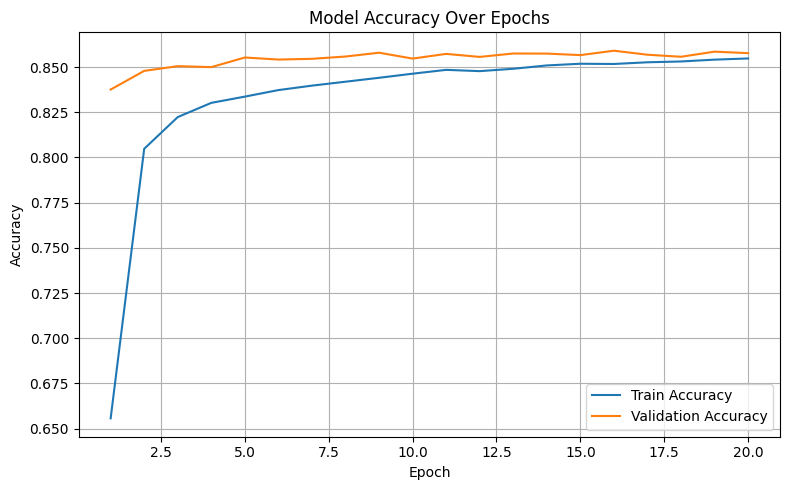

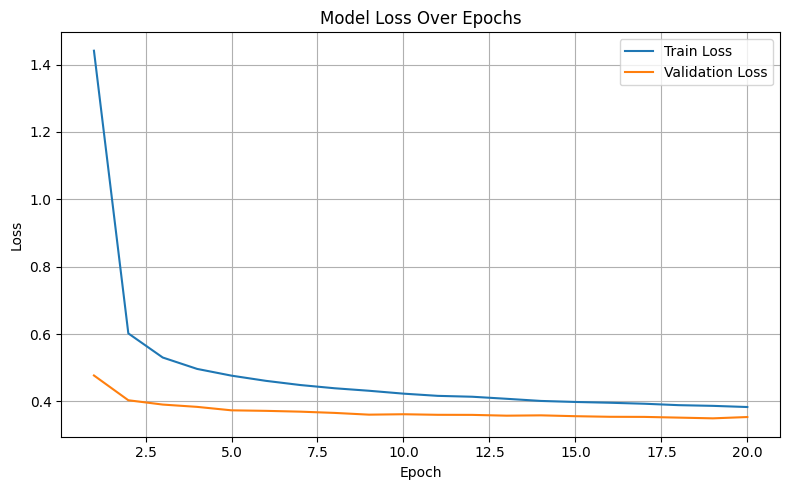

In [ ]:
import matplotlib.pyplot as plt

# Get number of actual epochs
epochs_ran = range(1, len(history.history['accuracy']) + 1)

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_ran, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs_ran, history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_ran, history.history['loss'], label='Train Loss')
plt.plot(epochs_ran, history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()